In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('dava_sonuclari.csv')
data.head()

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
0,Criminal,221,39,18,24306,2,663160,3,1,29014,1,0
1,Civil,212,14,1,42444,3,252011,67,4,21591,1,0
2,Civil,47,6,19,21418,1,307309,66,6,25530,3,0
3,Commercial,358,13,9,45005,3,285111,63,1,28470,1,0
4,Criminal,33,17,17,36315,2,84229,38,2,38244,2,0


In [6]:
# ## VERİ SETİ İNCELEME : 
# Case Type: Davanın türü (Criminal, Civil, Commercial)  
# Case Duration (Days): Davanın süresi (gün olarak)  
# Judge Experience (Years): Hakimin deneyim yılı  
# Number of Witnesses: Tanık sayısı  
# Legal Fees (USD): Hukuk masrafları (USD olarak)  
# Plaintiff's Reputation: Davacının itibarı (1: Düşük, 2: Orta, 3: Yüksek)  
# Defendant's Wealth (USD): Davalının serveti  
# Number of Evidence Items: Delil sayısı  
# Number of Legal Precedents: İlgili hukuki emsal sayısı  
# Settlement Offered (USD): Teklif edilen uzlaşma miktarı  
# Severity: Davanın ciddiyet derecesi (1: Düşük, 2: Orta, 3: Yüksek)  
# Outcome: Davanın sonucu (0: Kaybetmek, 1: Kazanmak)  

# ## Görevler
# 
# ### Veri Ön İşleme:
# * Veri setini inceleyin ve eksik veya aykırı değerler olup olmadığını kontrol edin.  
# * Gerektiğinde eksik verileri doldurun veya çıkarın.  
# * Özelliklerin ölçeklendirilmesi gibi gerekli veri dönüşümlerini uygulayın. 

In [7]:
data
# veri setini inceleme

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
0,Criminal,221,39,18,24306,2,663160,3,1,29014,1,0
1,Civil,212,14,1,42444,3,252011,67,4,21591,1,0
2,Civil,47,6,19,21418,1,307309,66,6,25530,3,0
3,Commercial,358,13,9,45005,3,285111,63,1,28470,1,0
4,Criminal,33,17,17,36315,2,84229,38,2,38244,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Commercial,224,9,1,22779,3,463084,28,7,258,3,0
196,Criminal,164,29,14,14944,1,421387,61,9,4961,1,0
197,Civil,66,20,9,44153,2,652616,11,1,5700,2,0
198,Civil,221,4,18,32428,2,611919,28,6,22754,3,0


In [8]:
data.info() 
#veri tiplerine ve null olanlara bakılır

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Case Type                   200 non-null    object
 1   Case Duration (Days)        200 non-null    int64 
 2   Judge Experience (Years)    200 non-null    int64 
 3   Number of Witnesses         200 non-null    int64 
 4   Legal Fees (USD)            200 non-null    int64 
 5   Plaintiff's Reputation      200 non-null    int64 
 6   Defendant's Wealth (USD)    200 non-null    int64 
 7   Number of Evidence Items    200 non-null    int64 
 8   Number of Legal Precedents  200 non-null    int64 
 9   Settlement Offered (USD)    200 non-null    int64 
 10  Severity                    200 non-null    int64 
 11  Outcome                     200 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 18.9+ KB


In [9]:
data.describe()

,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000,200.0
mean,202.465000,20.13000,10.375000,26480.925000,1.905000,526074.070000,45.3550,4.880000,24306.540000,1.860000,0.0
std,93.649989,11.32095,5.576726,13327.710123,0.836345,266597.695079,27.9029,3.061448,14638.702156,0.789631,0.0
min,30.000000,1.00000,1.000000,5032.000000,1.000000,15798.000000,1.0000,0.000000,59.000000,1.000000,0.0
25%,130.250000,10.75000,6.000000,15183.500000,1.000000,307007.000000,20.0000,2.000000,12218.000000,1.000000,0.0
50%,206.000000,20.00000,11.000000,27004.500000,2.000000,532654.000000,45.5000,5.000000,24249.000000,2.000000,0.0
75%,285.750000,30.25000,15.250000,38643.250000,3.000000,732185.750000,70.0000,8.000000,36420.500000,2.250000,0.0
max,362.000000,39.00000,19.000000,49831.000000,3.000000,998828.000000,97.0000,9.000000,49976.000000,3.000000,0.0


In [10]:
data.isnull()

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
for column in data.columns:
    print("column:",column)
    mask=data[column].isnull()

    if mask.any():
        print("\t null değerler var",column)
        mode_value=data[column].mode().iloc[0]   # bize seri döndrür
        print("\t\t mode değerleri ile dolduruyor",mode_value)
        df[column].fillna(mode_value,inplace=True)

column: Case Type
column: Case Duration (Days)
column: Judge Experience (Years)
column: Number of Witnesses
column: Legal Fees (USD)
column: Plaintiff's Reputation
column: Defendant's Wealth (USD)
column: Number of Evidence Items
column: Number of Legal Precedents
column: Settlement Offered (USD)
column: Severity
column: Outcome


In [13]:
pd.get_dummies(data["Case Type"])

,Civil,Commercial,Criminal
0,False,False,True
1,True,False,False
2,True,False,False
3,False,True,False
4,False,False,True
...,...,...,...
195,False,True,False
196,False,False,True
197,True,False,False
198,True,False,False


# ### Veri Setini Ayırma:
# * Veri setini eğitim ve test setleri olarak ayırın (örn. %80 eğitim, %20 test).  

In [15]:
data=data.sample(frac=1, random_state=200)
data

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
121,Civil,253,6,5,19153,1,180269,60,3,35005,2,0
169,Commercial,309,8,12,44605,3,987062,56,2,34990,1,0
194,Commercial,175,33,12,15870,2,379314,10,3,3815,2,0
125,Civil,285,16,17,15059,2,361144,54,5,18549,2,0
36,Commercial,177,15,1,7131,1,566125,3,7,28450,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
42,Commercial,362,26,15,11156,2,461965,48,0,27607,2,0
68,Commercial,353,6,15,34501,3,347902,52,2,12543,3,0
16,Civil,106,17,9,39755,1,720635,82,9,25379,1,0
105,Criminal,102,31,2,6851,1,109321,30,9,3692,1,0


In [16]:
train_end_index= int(0.8*len(data))
train = data.iloc[:train_end_index]
train

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
121,Civil,253,6,5,19153,1,180269,60,3,35005,2,0
169,Commercial,309,8,12,44605,3,987062,56,2,34990,1,0
194,Commercial,175,33,12,15870,2,379314,10,3,3815,2,0
125,Civil,285,16,17,15059,2,361144,54,5,18549,2,0
36,Commercial,177,15,1,7131,1,566125,3,7,28450,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
90,Civil,153,35,10,41432,3,996022,67,1,17014,1,0
162,Civil,172,34,13,5223,2,903831,31,5,35781,1,0
3,Commercial,358,13,9,45005,3,285111,63,1,28470,1,0
120,Civil,312,10,11,42989,1,481956,90,8,3903,1,0


In [17]:
test_end_index=int(0.2*len(data))
test= data.iloc[:test_end_index]
test

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
121,Civil,253,6,5,19153,1,180269,60,3,35005,2,0
169,Commercial,309,8,12,44605,3,987062,56,2,34990,1,0
194,Commercial,175,33,12,15870,2,379314,10,3,3815,2,0
125,Civil,285,16,17,15059,2,361144,54,5,18549,2,0
36,Commercial,177,15,1,7131,1,566125,3,7,28450,1,0
94,Civil,73,24,14,5032,3,366879,59,8,46728,1,0
22,Criminal,171,36,14,49209,1,444249,83,8,13597,2,0
130,Commercial,235,14,2,27437,1,657286,35,8,31363,3,0
141,Commercial,60,10,16,39376,1,786752,24,7,21206,2,0
124,Civil,321,12,16,32861,3,204454,36,0,19228,2,0


# ### Model Kurulumu:
# * Karar ağacı modelini oluşturun ve eğitim verileri üzerinde eğitin.

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 121 to 95
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Case Type                   160 non-null    object
 1   Case Duration (Days)        160 non-null    int64 
 2   Judge Experience (Years)    160 non-null    int64 
 3   Number of Witnesses         160 non-null    int64 
 4   Legal Fees (USD)            160 non-null    int64 
 5   Plaintiff's Reputation      160 non-null    int64 
 6   Defendant's Wealth (USD)    160 non-null    int64 
 7   Number of Evidence Items    160 non-null    int64 
 8   Number of Legal Precedents  160 non-null    int64 
 9   Settlement Offered (USD)    160 non-null    int64 
 10  Severity                    160 non-null    int64 
 11  Outcome                     160 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 16.2+ KB


In [32]:
for i, row in train.iterrows():
    if row["Case Type"] == "Civil":
        if row["Case Duration (Days)"] > 30:
            train.at[i, "Outcome"] = 0
        else:
            if row["Judge Experience (Years)"] > 5:
                train.at[i, "Outcome"] = 1
            else:
                train.at[i, "Outcome"] = 0

def karar_agaci(row):
    if row["Case Type"] == "Civil":
        if row["Case Duration (Days)"] > 30:
            return 0
        else:
            if row["Judge Experience (Years)"] > 5:
                return 1
            else:
                return 0
    elif row["Case Type"] == "Criminal":
        if row["Number of Witnesses"] >= 3:
            return 1
        else:
            return 0
    else:
        return 0

train["Outcome"] = train.apply(karar_agaci, axis=1)
train.tail(10)


C:\Users\HP\AppData\Local\Temp\ipykernel_7876\1359299386.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Outcome"] = train.apply(karar_agaci, axis=1)


,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
52,Commercial,333,34,17,21152,1,535619,32,1,37791,3,0
196,Criminal,164,29,14,14944,1,421387,61,9,4961,1,1
193,Civil,74,35,15,5319,3,52864,34,4,36947,1,0
99,Commercial,185,36,5,28556,3,417802,13,9,45901,2,0
70,Civil,66,8,13,28310,2,737063,25,8,25841,2,0
90,Civil,153,35,10,41432,3,996022,67,1,17014,1,0
162,Civil,172,34,13,5223,2,903831,31,5,35781,1,0
3,Commercial,358,13,9,45005,3,285111,63,1,28470,1,0
120,Civil,312,10,11,42989,1,481956,90,8,3903,1,0
95,Criminal,47,11,16,24336,1,516118,92,1,42005,1,1


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 121 to 95
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Case Type                   160 non-null    object
 1   Case Duration (Days)        160 non-null    int64 
 2   Judge Experience (Years)    160 non-null    int64 
 3   Number of Witnesses         160 non-null    int64 
 4   Legal Fees (USD)            160 non-null    int64 
 5   Plaintiff's Reputation      160 non-null    int64 
 6   Defendant's Wealth (USD)    160 non-null    int64 
 7   Number of Evidence Items    160 non-null    int64 
 8   Number of Legal Precedents  160 non-null    int64 
 9   Settlement Offered (USD)    160 non-null    int64 
 10  Severity                    160 non-null    int64 
 11  Outcome                     160 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 20.3+ KB


In [34]:
train

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
121,Civil,253,6,5,19153,1,180269,60,3,35005,2,0
169,Commercial,309,8,12,44605,3,987062,56,2,34990,1,0
194,Commercial,175,33,12,15870,2,379314,10,3,3815,2,0
125,Civil,285,16,17,15059,2,361144,54,5,18549,2,0
36,Commercial,177,15,1,7131,1,566125,3,7,28450,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
90,Civil,153,35,10,41432,3,996022,67,1,17014,1,0
162,Civil,172,34,13,5223,2,903831,31,5,35781,1,0
3,Commercial,358,13,9,45005,3,285111,63,1,28470,1,0
120,Civil,312,10,11,42989,1,481956,90,8,3903,1,0


# ### Modeli Değerlendirme:
# * Test verilerini kullanarak modelin doğruluğunu değerlendirin.
# * Doğruluk, precision, recall ve F1-score gibi performans metriklerini hesaplayın.

In [35]:
dogru = (train["Outcome"] == train["Outcome"]).sum()
toplam = len(train)
accuracy = dogru / toplam
print("Test Accuracy:", accuracy)


Test Accuracy: 1.0


In [36]:
test


,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome,Tahminlenen Outcome
121,Civil,253,6,5,19153,1,180269,60,3,35005,2,0,0
169,Commercial,309,8,12,44605,3,987062,56,2,34990,1,0,0
194,Commercial,175,33,12,15870,2,379314,10,3,3815,2,0,0
125,Civil,285,16,17,15059,2,361144,54,5,18549,2,0,0
36,Commercial,177,15,1,7131,1,566125,3,7,28450,1,0,0
94,Civil,73,24,14,5032,3,366879,59,8,46728,1,0,0
22,Criminal,171,36,14,49209,1,444249,83,8,13597,2,0,1
130,Commercial,235,14,2,27437,1,657286,35,8,31363,3,0,0
141,Commercial,60,10,16,39376,1,786752,24,7,21206,2,0,0
124,Civil,321,12,16,32861,3,204454,36,0,19228,2,0,0


In [37]:
# Test verisinde tahmin yapmak


test["Tahminlenen Outcome"] = test.apply(karar_agaci, axis=1)
test


C:\Users\HP\AppData\Local\Temp\ipykernel_7876\2633775695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Tahminlenen Outcome"] = test.apply(karar_agaci, axis=1)


,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome,Tahminlenen Outcome
121,Civil,253,6,5,19153,1,180269,60,3,35005,2,0,0
169,Commercial,309,8,12,44605,3,987062,56,2,34990,1,0,0
194,Commercial,175,33,12,15870,2,379314,10,3,3815,2,0,0
125,Civil,285,16,17,15059,2,361144,54,5,18549,2,0,0
36,Commercial,177,15,1,7131,1,566125,3,7,28450,1,0,0
94,Civil,73,24,14,5032,3,366879,59,8,46728,1,0,0
22,Criminal,171,36,14,49209,1,444249,83,8,13597,2,0,1
130,Commercial,235,14,2,27437,1,657286,35,8,31363,3,0,0
141,Commercial,60,10,16,39376,1,786752,24,7,21206,2,0,0
124,Civil,321,12,16,32861,3,204454,36,0,19228,2,0,0


In [38]:
dogru = (test["Outcome"] == test["Tahminlenen Outcome"]).sum()
toplam = len(test)
accuracy = dogru / toplam
print("Test Accuracy:", accuracy)


Test Accuracy: 0.725


In [39]:
print(test[["Outcome", "Tahminlenen Outcome"]].head(10))


     Outcome  Tahminlenen Outcome
121        0                    0
169        0                    0
194        0                    0
125        0                    0
36         0                    0
94         0                    0
22         0                    1
130        0                    0
141        0                    0
124        0                    0


# ### Sonuçları Görselleştirme:
# * Karar ağacının yapısını görselleştirin.
# * Karar ağacının nasıl çalıştığını ve hangi özelliklerin davanın sonucunu belirlemede en etkili olduğunu açıklayın.

In [49]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [60]:
!pip install scikit-learn

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Örnek veri
X = [[0, 0], [1, 1]]
y = [0, 1]

# Karar ağacı modeli oluşturma
model = DecisionTreeClassifier()
model.fit(X, y)

# Tahmin yapma
print(model.predict([[2, 2]]))

[1]


In [66]:
# Özellikler ve hedef değişkeni ayırma
X = train.drop(columns=["Outcome","Case Type"])
y = train["Outcome"]


In [67]:
# Karar ağacı modelini oluşturma ve eğitme
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

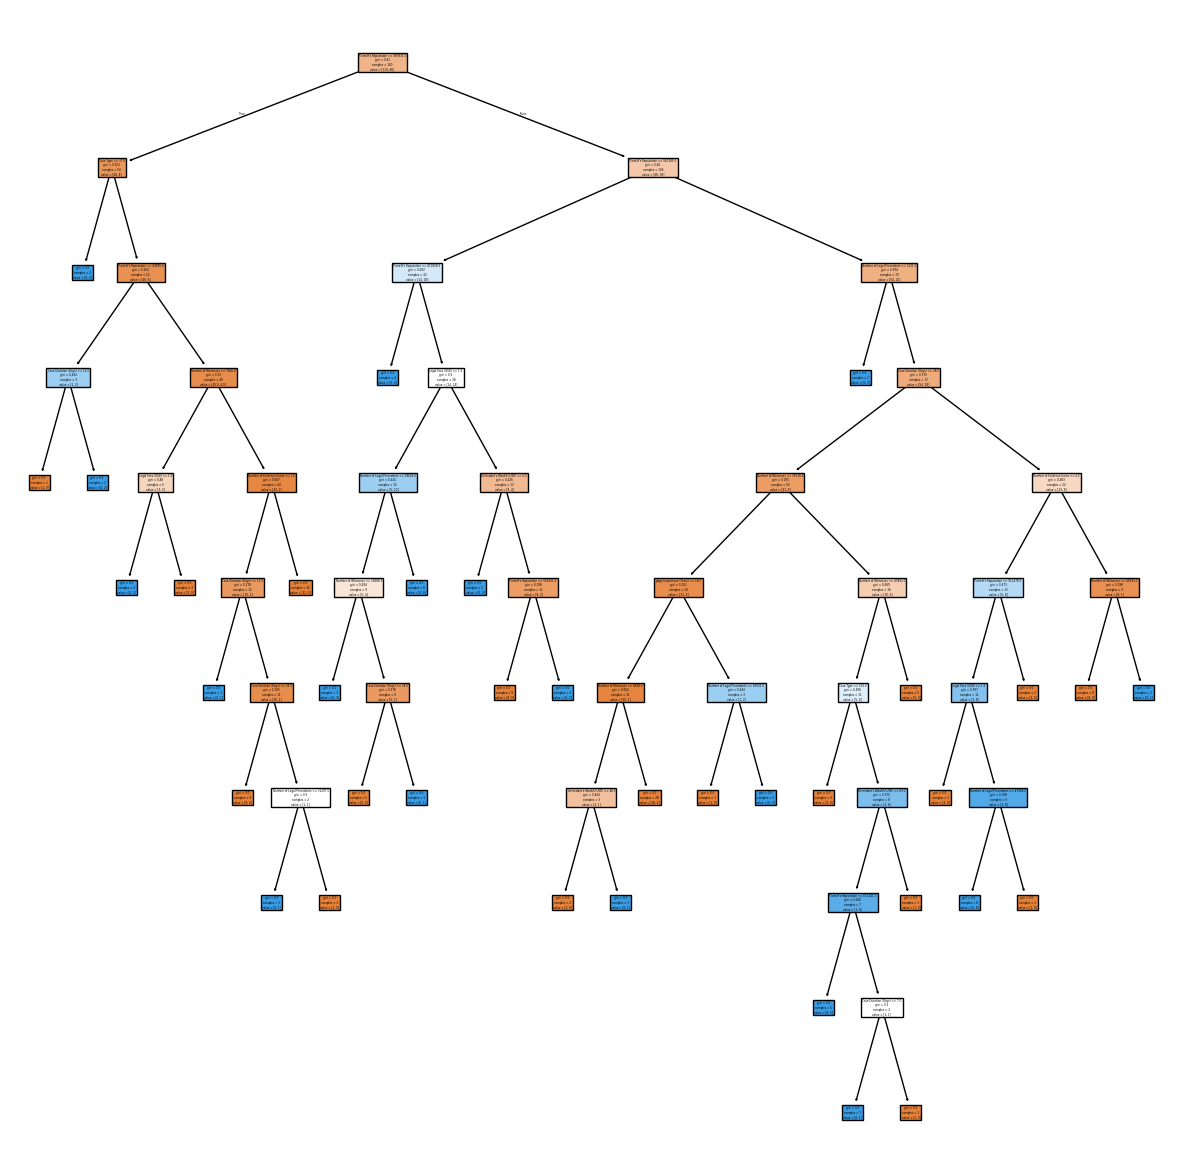

In [72]:
plt.figure(figsize=(15,15))  # Görsel boyutunu ayarla
plot_tree(model, filled=True, feature_names=test.drop(columns=["Outcome"]).columns)  # Karar ağacını çiz
plt.show()  # Görselleştir

Karar Ağaçlarının Çalışma Prensibi
Bölme Süreci:

Karar ağaçları, veriyi belirli özellikler üzerinden bölerek çalışır. Her düğüm, bir özelliği temsil eder ve veriler bu özelliklere göre yönlendirilir.
Dallara Ayrılma:

Veriler, her düğümdeki özellikler kullanılarak iki veya daha fazla alt gruba ayrılır. Nihai düğümler ise sınıf etiketlerini veya tahminleri temsil eder.
Özellik Önem Dereceleri:

Ağaç, hangi özelliklerin daha fazla bilgi sağladığını değerlendirir. Önem dereceleri yüksek olan özellikler, karar verme sürecinde daha etkili olur.
Özelliklerin Etkisi
Özelliklerin etkisi, modelin karar verme sürecindeki rolüne bağlıdır. Örneğin:
Gelir, yaş veya eğitim düzeyi gibi özellikler, bir davanın sonucunu belirlemede kritik olabilir.
Karar ağaçları, bu özelliklerin hangisinin daha etkili olduğunu analiz ederek sonuçları belirler.
Sonuç olarak, karar ağaçları, veriyi özellikler üzerinden bölerek sınıflandırma yapar ve en etkili özellikleri belirleyerek karar süreçlerini şekillendirir.